# **Evaluasi Data Penggunaan Bus Khusus Wanita sebagai Transportasi Aman di Jakarta**

# 1. Overview

**Latar Belakang**

TransJakarta adalah sistem transportasi publik di Jakarta, Indonesia, yang pertama kali dioperasikan pada tahun 2004. Dengan lebih dari 13 koridor yang melintasi berbagai bagian kota, TransJakarta menghubungkan rute penting antara pusat bisnis dan area perumahan. Salah satu upaya untuk meningkatkan keamanan dan kenyamanan bagi penumpang adalah dengan menghadirkan Bus Khusus Wanita.

Selain itu, penyediaan Bus Khusus Wanita juga dilakukan sebagai antisipasi untuk meminimalkan terjadinya pelecehan seksual dan mengurangi kekhawatiran saat menggunakan transportasi publik. Dilansir dari laman Fortune Indonesia, armada bus TransJakarta khusus wanita akan dioperasikan secara bertahap. Pada tahap I, sebanyak 15 armada akan dioperasikan mulai Senin, 27 Februari 2023 di lima koridor dan akan ada penambahan lima unit armada Bus Khusus Wanita dan dua rute tambahan di bulan Maret (Tahap II), sehingga akan ada total 20 armada bus dengan jangkauan tujuh rute.

Evaluasi terhadap operasional bus khusus ini menjadi penting untuk mengetahui efektivitasnya dalam menciptakan pengalaman perjalanan yang aman bagi penumpang wanita. Hasil evaluasi ini akan disampaikan kepada pemangku kepentingan sebagai dasar pengambilan keputusan strategis bagi pengembangan layanan TransJakarta khusus Wanita yang lebih baik.

**Rumusan Masalah**
1. Apakah penggunaan Bus Khusus Wanita sudah berjalan dengan efektif berdasarkan distribusi penumpang?
2. Bagaimana pola penggunaan layanan berdasarkan koridor?

**Tujuan**

Secara umum, analisis ini bertujuan untuk melakukan evaluasi mengenai operasi Bus Khusus Wanita yang telah berjalan secara bertahap pada bulan Februari dan Maret di tujuh koridor yang berbeda. Adapun tujuan khusus dari evaluasi data ini adalah:

1. Menganalisis efektivitas penggunaan Bus Khusus Wanita berdasarkan data distribusi penumpang harian;
2. Mengidentifikasi pola penggunaan layanan berdasarkan koridor.

**Limitasi Project**

1. Data yang dianalisis terbatas pada periode 1 April hingga 30 April 2023;
2. Jumlah data yang digunakan sebanyak 35428 sampel, 1976 data unik, dengan 16 kolom hasil modifikasi. Adapun data sampel berdasarkan demografi Gender (Wanita) sebanyak 18848, 1052 data unik, 17 kolom hasil modifikasi, dan 7 koridor spesifik;
3. Tidak tersedia data kepuasan pengguna;
4. Tidak tersedia data insiden keamanan;
5. Data tidak mencakup informasi tentang kapasitas bus per koridor.


**Stakeholder**

PT Transportasi Jakarta / Jaklingko
   - Operasional Bus Khusus Wanita
   - Manajemen armada dan rute
   - Pengembangan layanan
   - Peningkatan kualitas pelayanan

**Referensi Luar**

*Badan Pusat Statistik Pemprov DKI Jakarta, 2023*

# 2. Data Understanding & Cleaning

## 2.1 Data Set Overview

Data set Transjakarta merupakan sebuah data perjalanan moda transportasi Bus MiniTrans, MetroTrans, RoyalTrans, dan Mikrotrans di Jakarta pada periode waktu 1 April 2023 - 30 April 2023.

Dataset ini terbagi atas 22 kolom dengan deksripsi sebagai berikut:

| No. | Kolom            | Deskripsi                                                                 |
|-----|------------------|--------------------------------------------------------------------------|
| 1   | transID          | Unique transaction ID untuk setiap transaksi                             |
| 2   | payCardID        | Identifikasi utama pelanggan. Kartu yang digunakan pelanggan untuk masuk dan keluar |
| 3   | payCardBank      | Nama bank penerbit kartu pelanggan                                        |
| 4   | payCardName      | Nama pelanggan yang tertanam di kartu                                     |
| 5   | payCardSex       | Jenis kelamin pelanggan yang tertanam di kartu                            |
| 6   | payCardBirthDate | Tahun lahir pelanggan                                                     |
| 7   | corridorID       | ID Koridor / ID Rute sebagai kunci pengelompokan rute                     |
| 8   | corridorName     | Nama Koridor / Nama Rute berisi nama awal dan akhir rute                  |
| 9   | direction        | 0 untuk berangkat, 1 untuk kembali. Arah dari rute                        |
| 10  | tapInStops       | ID Halte Tap In (masuk) untuk mengidentifikasi nama halte                 |
| 11  | tapInStopsName   | Nama Halte Tap In (masuk) di mana pelanggan melakukan tap in              |
| 12  | tapInStopsLat    | Latitude dari Halte Tap In                                                |
| 13  | tapInStopsLon    | Longitude dari Halte Tap In                                               |
| 14  | stopStartSeq     | Urutan pemberhentian, halte pertama, halte kedua, dsb. terkait dengan arah |
| 15  | tapInTime        | Waktu tap in. Tanggal dan waktu                                           |
| 16  | tapOutStops      | ID Halte Tap Out (keluar) untuk mengidentifikasi nama halte               |
| 17  | tapOutStopsName  | Nama Halte Tap Out (keluar) di mana pelanggan melakukan tap out           |
| 18  | tapOutStopsLat   | Latitude dari Halte Tap Out                                               |
| 19  | tapOutStopsLon   | Longitude dari Halte Tap Out                                              |
| 20  | stopEndSeq       | Urutan pemberhentian, halte pertama, halte kedua, dsb. terkait dengan arah |
| 21  | tapOutTime       | Waktu tap out. Tanggal dan waktu                                          |
| 22  | payAmount        | Jumlah yang dibayarkan pelanggan. Beberapa gratis, beberapa tidak         |

## 2.2 Import Library

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

## 2.3 Load Data Set

In [45]:
transjakarta = pd.read_csv('Transjakarta.csv')
transjakarta

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


## 2.4 Informasi Data Set

In [46]:
info_transjakarta = pd.DataFrame(transjakarta.dtypes, columns=['Data Type'])
info_transjakarta['NaN Count'] = transjakarta.isna().sum()

info_transjakarta

,Data Type,NaN Count
transID,object,0
payCardID,int64,0
payCardBank,object,0
payCardName,object,0
payCardSex,object,0
payCardBirthDate,int64,0
corridorID,object,1257
corridorName,object,1930
direction,float64,0
tapInStops,object,1213


In [47]:
display(transjakarta.describe(), transjakarta.describe(include=object))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [48]:
list_item = []
for col in transjakarta.columns:
    list_item.append([col, transjakarta[col].nunique(), transjakarta[col].unique()])

tabel_desc = pd.DataFrame(columns=['Columns', 'Count of Unique Value', 'Unique Value'], data=list_item)
tabel_desc

,Columns,Count of Unique Value,Unique Value
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


## 2.5 Data Cleaning

### 2.5.1 Menghapus Kolom

In [49]:
transjakarta.drop(columns=['payCardBank', 'payCardName', 'stopStartSeq', 'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon',
                           'stopEndSeq', 'payAmount'], inplace=True)
transjakarta.rename(columns={'payCardSex':'Sex',
                             'payCardBirthDate': 'Birth Date'}, inplace=True)

transjakarta

,transID,payCardID,Sex,Birth Date,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
0,EIIW227B8L34VB,180062659848800,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,2023-04-03 05:21:44,P00253,Tegalan,2023-04-03 06:00:53
1,LGXO740D2N47GZ,4885331907664776,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01
2,DJWR385V2U57TO,4996225095064169,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,2023-04-03 06:50:55
3,JTUZ800U7C86EH,639099174703,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16
4,VMLO535V7F95NJ,570928206772,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,2023-04-03 06:17:35,P00098,Kali Besar Barat,2023-04-03 06:57:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,2023-04-21 18:18:37,P00228,SMK 57,2023-04-21 19:55:49
37896,YHHK837P6Y95GN,6502902290603767,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,2023-04-18 21:52:31,P00179,Pinang Ranti,2023-04-18 22:28:22
37897,YXPP627N4G95HO,213159426675861,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,2023-04-04 10:29:47,B00226P,Buperta Cibubur,2023-04-04 13:27:25
37898,RGVK175U2U98UV,377840859133591,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,2023-04-15 19:59:26,B01787P,JPO Blok G,2023-04-15 20:27:50


In [50]:
# Deskripsi Nama Kolom dan Jumlah Missing Value

transjakarta.isna().sum()

transID               0
payCardID             0
Sex                   0
Birth Date            0
corridorID         1257
corridorName       1930
direction             0
tapInStops         1213
tapInStopsName        0
tapInTime             0
tapOutStops        2289
tapOutStopsName    1344
tapOutTime         1344
dtype: int64

### 2.5.2 Modifikasi Data

#### 2.5.2.1 Modifikasi Tipe Data Tanggal dan Waktu

In [51]:
transjakarta['tapInTime'] = pd.to_datetime(transjakarta['tapInTime'])
transjakarta['tapOutTime'] = pd.to_datetime(transjakarta['tapOutTime'])

transjakarta['Day'] = transjakarta['tapInTime'].dt.dayofweek
Day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

transjakarta['Day'] = transjakarta['Day'].map(Day)

#### 2.5.2.2 Menambah Kolom Tanggal

In [52]:
transjakarta['Date'] = transjakarta['tapOutTime'].dt.strftime('%d')

#### 2.5.2.3 Menambah Kolom Umur

In [53]:
transjakarta['Birth Date'] = transjakarta['Birth Date'].astype('Int64')

transjakarta['Age'] = 2023-transjakarta['Birth Date']

transjakarta

,transID,payCardID,Sex,Birth Date,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,Day,Date,Age
0,EIIW227B8L34VB,180062659848800,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,2023-04-03 05:21:44,P00253,Tegalan,2023-04-03 06:00:53,Monday,03,15
1,LGXO740D2N47GZ,4885331907664776,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01,Monday,03,26
2,DJWR385V2U57TO,4996225095064169,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,2023-04-03 06:50:55,Monday,03,31
3,JTUZ800U7C86EH,639099174703,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16,Monday,03,45
4,VMLO535V7F95NJ,570928206772,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,2023-04-03 06:17:35,P00098,Kali Besar Barat,2023-04-03 06:57:03,Monday,03,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,2023-04-21 18:18:37,P00228,SMK 57,2023-04-21 19:55:49,Friday,21,19
37896,YHHK837P6Y95GN,6502902290603767,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,2023-04-18 21:52:31,P00179,Pinang Ranti,2023-04-18 22:28:22,Tuesday,18,49
37897,YXPP627N4G95HO,213159426675861,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,2023-04-04 10:29:47,B00226P,Buperta Cibubur,2023-04-04 13:27:25,Tuesday,04,47
37898,RGVK175U2U98UV,377840859133591,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,2023-04-15 19:59:26,B01787P,JPO Blok G,2023-04-15 20:27:50,Saturday,15,47


## 2.6 Handling Missing Values

In [54]:
# Menghitung jumlah dan presentase nilai yang hilang di setiap kolom
missing_values = transjakarta.isnull().sum()
missing_percentage = (missing_values / len(transjakarta)) * 100

# Membuat DataFrame baru untuk menyimpan hasil
missing_info = pd.DataFrame({'Count of Missing': missing_values, 'Percentage of  Missing (%)': round(missing_percentage, 2)})

# Memfilter kolom yang memiliki nilai yang hilang
missing_info_filtered = missing_info[(missing_info['Count of Missing'] > 0)]
missing_info_filtered

,Count of Missing,Percentage of Missing (%)
corridorID,1257,3.32
corridorName,1930,5.09
tapInStops,1213,3.20
tapOutStops,2289,6.04
tapOutStopsName,1344,3.55
tapOutTime,1344,3.55
Date,1344,3.55


### 2.6.1 Handling Missing Values CorridorID yang Kosong

Handling missing values untuk corridorID yang kosong berdasarkan corridorName.

In [55]:
corridor_name = transjakarta.groupby('corridorID').agg(
    empty_corridor_names=('corridorName', lambda x: list(x[x.isna()])),
    filled_corridor_name=('corridorName', lambda x: x[x.notna()].iloc[0] if not x[x.notna()].empty else None)
).reset_index()

corridor_name.rename(columns={'empty_corridor_names':'Empty Corridor Name',
                              'filled_corrdor_name':'Filled Corridor Name'
                              })

,corridorID,Empty Corridor Name,filled_corridor_name
0,1,"[nan, nan, nan, nan, nan, nan]",Blok M - Kota
1,10,"[nan, nan, nan, nan]",Tanjung Priok - PGC 2
2,10A,"[nan, nan, nan, nan, nan]",Rusun Marunda - Tanjung Priok
3,10B,"[nan, nan]",Rusun Cipinang Besar Selatan - Penas Kalimalang
4,10D,[],Kampung Rambutan - Tanjung Priok
...,...,...,...
216,S21,"[nan, nan, nan, nan, nan]",Ciputat - CSW
217,S22,"[nan, nan, nan]",Ciputat - Kampung Rambutan
218,S31,"[nan, nan, nan, nan, nan]",Bintaro - Fatmawati
219,T11,"[nan, nan, nan, nan]",Poris Plawad - Bundaran Senayan


In [56]:
corridor_id_mapping = transjakarta.dropna(subset=['corridorID']).drop_duplicates('corridorName')
corridor_id_mapping = corridor_id_mapping.set_index('corridorName')['corridorID']

def fill_missing_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        return corridor_id_mapping.get(row['corridorName'])
    return row['corridorID']

transjakarta['corridorID'] = transjakarta.apply(fill_missing_corridor_id, axis = 1)

### 2.6.2 Handling Missing Values corridorName yang Kosong

Handling missing values untuk corridorName yang kosong berdasarkan corridorID.

In [57]:
corridor_id = transjakarta.groupby('corridorName').agg(
    empty_corridor_ids=('corridorID', lambda x: list(x[x.isna()])),
    filled_corridor_id=('corridorID', lambda x: x[x.notna()].iloc[0] if not x[x.notna()].empty else None)
).reset_index()

corridor_id.rename(columns={'empty_corridor_ids':'Empty Corridor ID',
                            'filled_corridor_id':'Filled Corridor ID'
                              })

,corridorName,Empty Corridor ID,Filled Corridor ID
0,Andara - Stasiun Universitas Pancasila,[],JAK.44
1,BKN - Blok M,[],M7B
2,BSD - Jelambar,[],S11
3,BSD Serpong - Fatmawati,[],S12
4,Batusari - Grogol,[],8K
...,...,...,...
211,Terminal Rawamangun - Cipinang Muara,[],JAK.74
212,Terminal Tanah Merah - Pulo Gadung,[],JAK.112
213,Terminal Tanjung Priok - Ancol Barat,[],JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,[],JAK.43B


In [58]:
corridor_name_mapping = transjakarta.dropna(subset=['corridorName']).drop_duplicates('corridorID')
corridor_name_mapping = corridor_name_mapping.set_index('corridorID')['corridorName']

def fill_missing_corridor_name(row):
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']):
        return corridor_name_mapping.get(row['corridorID'])
    return row['corridorName']

transjakarta['corridorName'] = transjakarta.apply(fill_missing_corridor_name, axis = 1)

### 2.6.3 Handling Missing Values tapInStops yang Kosong

Handling missing values untuk baris pada kolom tapInStops yang kosong berdasarkan kolom tapInStopsName.

In [59]:
tapin_stops = transjakarta.groupby('tapInStopsName').agg(
    empty_tapInStops=('tapInStops', lambda x: list(x[x.isna()])),
    filled_tapInStops=('tapInStops', lambda x: x[x.notna()].iloc[0] if not x[x.notna()].empty else None)
).reset_index()

tapin_stops.rename(columns={'empty_tapInStops':'Empty Tap In Stops',
                            'filled_tapInStops':'Filled Tap In Stops'})

,tapInStopsName,Empty Tap In Stops,Filled Tap In Stops
0,18 Office Park,[nan],B00001P
1,ACC Simatupang,[],B00004P
2,ACE Hardware,"[nan, nan]",B00005P
3,AKR Tower,[],B00018P
4,ASEAN,[],P00004
...,...,...,...
2597,Yayasan Nurul Ihsan Pulo Gebang,[],B05926P
2598,Yayasan Perguruan Rakyat 2,[],B05929P
2599,Yon Arhanud - 10 Pesanggrahan,[nan],B05933P
2600,Yos Sudarso Kodamar,[],P00274


In [60]:
tapinstops_mapping = transjakarta.dropna(subset=['tapInStops']).drop_duplicates('tapInStopsName')
tapinstops_mapping = tapinstops_mapping.set_index('tapInStopsName')['tapInStops']

def fill_missing_tapinstops(row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName']):
        return tapinstops_mapping.get(row['tapInStopsName'])
    return row['tapInStops']

transjakarta['tapInStops'] = transjakarta.apply(fill_missing_tapinstops, axis = 1)

### 2.6.5 Handling Missing Values tapOutStops yang Kosong

Handling missing values baris pada kolom tapOutStops yang kosong berdasarkan kolom tapOutStopsName.

In [61]:
tapout_stops = transjakarta.groupby('tapOutStopsName').agg(
    empty_tapOutStops=('tapOutStops', lambda x: list(x[x.isna()])),
    filled_tapOutStops=('tapOutStops', lambda x: x[x.notna()].iloc[0] if not x[x.notna()].empty else None)
).reset_index()

# Mengganti nama kolom untuk hasil yang lebih jelas
tapout_stops.rename(columns={
    'empty_tapOutStops': 'Empty Tap Out Stops',
    'filled_tapOutStops': 'Filled Tap Out Stops'})

,tapOutStopsName,Empty Tap Out Stops,Filled Tap Out Stops
0,ABA,[],B00002P
1,ACC Simatupang,[],B00004P
2,ACE Hardware,[],B00005P
3,ASEAN,[],P00004
4,ASMI,[nan],P00005
...,...,...,...
2243,Yayasan Perguruan Rakyat 2,[],B05929P
2244,Yon Arhanud - 10 Pesanggrahan,[],B05933P
2245,Yos Sudarso Kodamar,[],P00274
2246,Yos Sudarso Kodamar 1,[],B05934P


In [62]:
tapoutstops_mapping = transjakarta.dropna(subset=['tapOutStops']).drop_duplicates('tapOutStopsName')
tapoutstops_mapping = tapoutstops_mapping.set_index('tapOutStopsName')['tapOutStops']

def fill_missing_tapoutstops(row):
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName']):
        return tapoutstops_mapping.get(row['tapOutStopsName'])
    return row['tapOutStops']

transjakarta['tapOutStops'] = transjakarta.apply(fill_missing_tapoutstops, axis = 1)

Menghitung jumlah dan persentase nilai yang hilang di setiap kolom setelah proses cleaning data

In [63]:
missing_values = transjakarta.isnull().sum()
missing_percentage = (missing_values / len(transjakarta)) * 100

missing_info = pd.DataFrame({'Count of Missing': missing_values, 'Percentage of Missing (%)': round(missing_percentage, 2)})

missing_info_filtered = missing_info[(missing_info['Count of Missing'] > 0)]
missing_info_filtered

,Count of Missing,Percentage of Missing (%)
corridorID,1125,2.97
corridorName,1125,2.97
tapInStops,34,0.09
tapOutStops,1363,3.60
tapOutStopsName,1344,3.55
tapOutTime,1344,3.55
Date,1344,3.55


Setelah mengisi beberapa baris yang kosong pada kolom tertentu, jumlah kolom yang missing (kosong) berkurang. Sisa missing values akan dihapus agar tidak merusak data asli.

### 2.6.8 Menghapus Missing Values

In [64]:
drop = transjakarta.dropna()

display(transjakarta.info(), transjakarta.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transID          37900 non-null  object        
 1   payCardID        37900 non-null  int64         
 2   Sex              37900 non-null  object        
 3   Birth Date       37900 non-null  Int64         
 4   corridorID       36775 non-null  object        
 5   corridorName     36775 non-null  object        
 6   direction        37900 non-null  float64       
 7   tapInStops       37866 non-null  object        
 8   tapInStopsName   37900 non-null  object        
 9   tapInTime        37900 non-null  datetime64[ns]
 10  tapOutStops      36537 non-null  object        
 11  tapOutStopsName  36556 non-null  object        
 12  tapOutTime       36556 non-null  datetime64[ns]
 13  Day              37900 non-null  object        
 14  Date             36556 non-null  objec

None

transID               0
payCardID             0
Sex                   0
Birth Date            0
corridorID         1125
corridorName       1125
direction             0
tapInStops           34
tapInStopsName        0
tapInTime             0
tapOutStops        1363
tapOutStopsName    1344
tapOutTime         1344
Day                   0
Date               1344
Age                   0
dtype: int64

berikut jumlah dan persentase data yang dihapus:

In [65]:
initial_shape = transjakarta.shape
print("Initial Shape:", initial_shape)

final_shape = drop.shape
print("Final Shape:", final_shape)

rows_dropped = initial_shape[0] - final_shape[0]
print(f"Rows Dropped: {rows_dropped}")
print(f"Percentage of Rows Dropped: {(rows_dropped / initial_shape[0]) * 100:.2f}%")

Initial Shape: (37900, 16)
Final Shape: (35428, 16)
Rows Dropped: 2472
Percentage of Rows Dropped: 6.52%


# 3. Exploratory Data Analysis (EDA)

In [66]:
transjakarta = drop
transjakarta

,transID,payCardID,Sex,Birth Date,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,Day,Date,Age
0,EIIW227B8L34VB,180062659848800,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,2023-04-03 05:21:44,P00253,Tegalan,2023-04-03 06:00:53,Monday,03,15
1,LGXO740D2N47GZ,4885331907664776,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01,Monday,03,26
2,DJWR385V2U57TO,4996225095064169,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,2023-04-03 06:50:55,Monday,03,31
3,JTUZ800U7C86EH,639099174703,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16,Monday,03,45
4,VMLO535V7F95NJ,570928206772,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,2023-04-03 06:17:35,P00098,Kali Besar Barat,2023-04-03 06:57:03,Monday,03,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,2023-04-21 18:18:37,P00228,SMK 57,2023-04-21 19:55:49,Friday,21,19
37896,YHHK837P6Y95GN,6502902290603767,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,2023-04-18 21:52:31,P00179,Pinang Ranti,2023-04-18 22:28:22,Tuesday,18,49
37897,YXPP627N4G95HO,213159426675861,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,2023-04-04 10:29:47,B00226P,Buperta Cibubur,2023-04-04 13:27:25,Tuesday,04,47
37898,RGVK175U2U98UV,377840859133591,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,2023-04-15 19:59:26,B01787P,JPO Blok G,2023-04-15 20:27:50,Saturday,15,47


In [67]:
list_item = []
for col in transjakarta.columns:
    list_item.append([col, transjakarta[col].nunique(), transjakarta[col].unique()])

tabel_desc = pd.DataFrame(columns=['Columns', 'Count of Unique Value', 'Unique Value'], data=list_item)
tabel_desc

,Columns,Count of Unique Value,Unique Value
0,transID,35428,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,1976,"[180062659848800, 4885331907664776, 4996225095..."
2,Sex,2,"[M, F]"
3,Birth Date,66,"[2008, 1997, 1992, 1978, 1982, 1993, 2004, 198..."
4,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, B14, 1Q, 5M, M7B, 9A..."
5,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
6,direction,2,"[1.0, 0.0]"
7,tapInStops,2492,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."
8,tapInStopsName,2491,"[Pal Putih, Kemenkes 2, Gg. Kunir II, Taman El..."
9,tapInTime,34705,"[2023-04-03 05:21:44, 2023-04-03 05:42:44, 202..."


## 3.1 Analisis Distribusi Gender dan Usia Penumpang

### 3.1.1 Analisis Distribusi Gender Penumpang

In [68]:
passenger_sex = transjakarta.groupby('Sex')['payCardID'].nunique().reset_index(name='Count of Passenger').drop_duplicates()
passenger_sex['Sex'] = passenger_sex['Sex'].replace({'F': 'Female', 'M': 'Male'})

passenger_sex

,Sex,Count of Passenger
0,Female,1052
1,Male,924


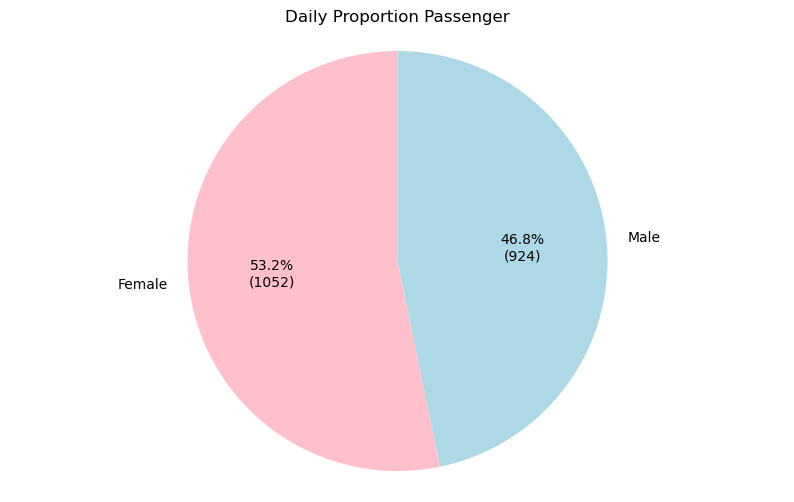

In [69]:
def autopct_with_counts(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f"{pct:.1f}%\n({absolute:d})"

# Membuat pie chart
plt.figure(figsize=(10, 6))
colors = ['pink' if sex == 'Female' else 'lightblue' for sex in passenger_sex['Sex']]

plt.pie(passenger_sex['Count of Passenger'], 
        labels=passenger_sex['Sex'], 
        autopct=lambda pct: autopct_with_counts(pct, passenger_sex['Count of Passenger']),
        startangle=90,
        colors=colors)

plt.title('Daily Proportion Passenger')
plt.axis('equal')
plt.show()

**Insight**:

Berdasarkan Pie Chart diatas, diketahui bahwa 53.2% penumpang Transjakarta adalah wanita, dengan jumlah sebesar 1052 penumpang.

### 3.1.2 Analisis Distribusi Usia Penumpang

In [70]:
age_distribution = transjakarta.groupby('Age')['payCardID'].nunique().reset_index(name='Count of Passengers')

age_sex_distribution = transjakarta.groupby(['Sex', 'Age'])['payCardID'].nunique().reset_index(name='Count of Passengers')

In [89]:
# Menambahkan kolom kategori usia

bins = [10, 17, 29, 49, 64, 77]
labels = ['Teen (10-16)', 'Young Adult(17-28)', 'Adult(29-48)', 'Middle Age(49-63)', 'Senior(64-76)']

transjakarta['AgeGroup'] = pd.cut(transjakarta['Age'], bins=bins, labels=labels)

# Mengelompokkan data berdasarkan kategori usia

age_group = transjakarta.groupby('AgeGroup')['payCardID'].nunique().reset_index(name='Count of Passengers')

age_group_distribution = transjakarta.groupby(['AgeGroup','Sex'], observed=False)['payCardID'].nunique().reset_index(name='Count of Passengers')

display(age_group, age_group_distribution)

,AgeGroup,Count of Passengers
0,Teen (10-16),294
1,Young Adult(17-28),509
2,Adult(29-48),936
3,Middle Age(49-63),209
4,Senior(64-76),28


,AgeGroup,Sex,Count of Passengers
0,Teen (10-16),F,181
1,Teen (10-16),M,113
2,Young Adult(17-28),F,315
3,Young Adult(17-28),M,194
4,Adult(29-48),F,488
5,Adult(29-48),M,448
6,Middle Age(49-63),F,63
7,Middle Age(49-63),M,146
8,Senior(64-76),F,5
9,Senior(64-76),M,23


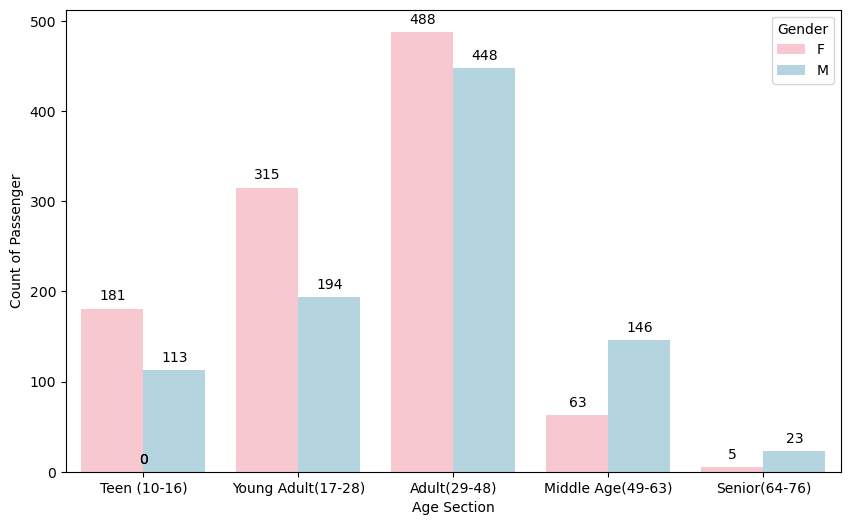

In [91]:
plt.figure(figsize=(10, 6))

bars = sns.barplot(data=age_group_distribution, x = 'AgeGroup', y = 'Count of Passengers', hue = 'Sex', palette={'F': 'pink', 'M': 'lightblue'})

# plt.title('Passenger Demography by Age and Gender')
plt.xlabel('Age Section')
plt.ylabel('Count of Passenger')

# Menambahkan anotasi ke setiap bar
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')

plt.legend(title='Gender')
plt.show()

**Insight**

Berdasarkan tabel, proporsi penumpang TransJakarta didominasi oleh kelompok usia Adult sebanyak 936 penumpang, diikuti Young Adult dan Teen.

Dalam demografi penumpang wanita, kategori usia Adult mendominasi dengan 488 penumpang, diusul oleh Young Adult dengan 315 penumpang dan Teen dengan 181 penumpang.

## 3.2 Analisis Distribusi Penumpang

### 3.2.1 Analisis Distribusi Penumpang Per Bulan

In [73]:
passenger_per_month = transjakarta.groupby(['Date', 'Sex'])['transID'].size().reset_index(name='Count of Passenger')

passenger_per_month.head()

,Date,Sex,Count of Passenger
0,01,F,6
1,01,M,8
2,02,F,6
3,02,M,1
4,03,F,796


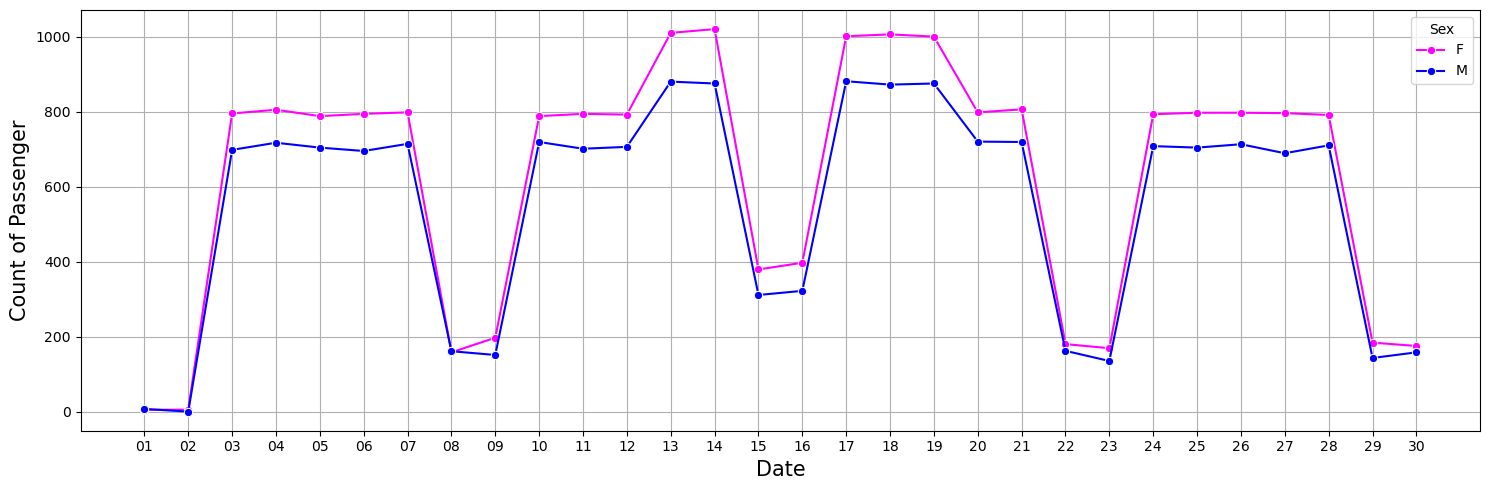

In [92]:
plt.figure(figsize=(15,5))

sns.lineplot(data=passenger_per_month, x='Date', y='Count of Passenger', hue = 'Sex',
             marker='o',  palette={'F':'magenta', 'M':'blue'})

# plt.title('Daily Passenger Distribution by Sex Within a Month', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Count of Passenger', size = 15)
plt.tight_layout()
plt.grid()
plt.show()

**Insight**

Berdasarkan grafik distribusi penumpang Transjakarta perbulan berdasarkan jenis kelamin, jumlah penumpang wanita cenderung lebih tinggi daripada penumpang laki-laki sepanjang bulan.  

### 3.2.2 Analisis Distribusi Penumpang per Hari

In [88]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transjakarta['Day'] = pd.Categorical(transjakarta['Day'], categories=day_order, ordered=True)

daily_passenger = transjakarta.groupby(['Day', 'Sex'])['transID'].size().reset_index(name='Count of Passenger')
daily_passenger = daily_passenger.sort_values(by='Day')

daily_passenger

,Day,Sex,Count of Passenger
0,Monday,F,3382
1,Monday,M,3010
2,Tuesday,F,3405
3,Tuesday,M,2998
4,Wednesday,F,3381
5,Wednesday,M,3002
6,Thursday,F,3402
7,Thursday,M,2988
8,Friday,F,3419
9,Friday,M,3022


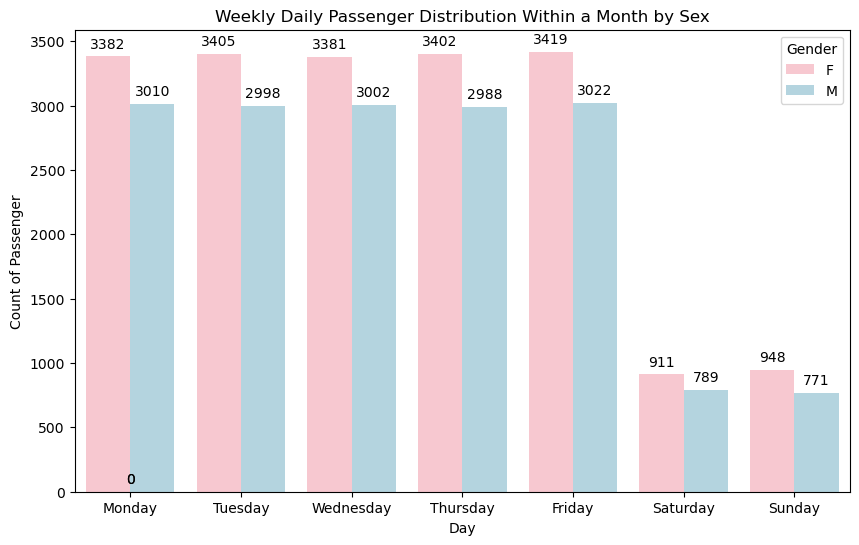

In [76]:
plt.figure(figsize=(10, 6))

bars = sns.barplot(data = daily_passenger, x = 'Day', y = 'Count of Passenger', hue = 'Sex', palette={'F': 'pink', 'M': 'lightblue'})

plt.title('Weekly Daily Passenger Distribution Within a Month by Sex')
plt.xlabel('Day')
plt.ylabel('Count of Passenger')

# Menambahkan anotasi ke setiap bar
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')

plt.legend(title='Gender')
plt.show()

**Insight**

Grafik menunjukkan bahwa jumlah penumpang wanita selalu lebih tinggi dibandingkan dengan penumpang laki-laki pada setiap hari dalam seminggu, dengan jumlah penumpang pada pada hari kerja (Senin - Jumat) cenderung lebih tinggi dibandingkan dengan akhir pekan (Sabtu dan Minggu).

# 4. Evaluasi Efektivitas
## 4.1 Data Penumpang dengan Jenis Kelamin wanita

In [77]:
female_passengers = transjakarta[transjakarta['Sex'] == 'F']

display(female_passengers)

print('Jumlah Penumpang wanita:',female_passengers['payCardID'].nunique(),'Penumpang')

,transID,payCardID,Sex,Birth Date,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,Day,Date,Age,AgeGroup
1,LGXO740D2N47GZ,4885331907664776,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,2023-04-03 06:40:01,Monday,03,26,Young Adult
2,DJWR385V2U57TO,4996225095064169,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,2023-04-03 06:50:55,Monday,03,31,Adult
3,JTUZ800U7C86EH,639099174703,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,2023-04-03 05:44:51,B03090P,Raya Penggilingan,2023-04-03 06:28:16,Monday,03,45,Adult
5,DDES630K2F80KC,2251412124634980,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,Benhil 3,2023-04-03 05:08:01,B00694P,Grand Sahid,2023-04-03 05:52:25,Monday,03,30,Adult
8,OIHS248V7S72EB,6510013988638519,F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,Imperium,2023-04-03 06:01:44,B01853P,Kayuringin 2,2023-04-03 06:51:12,Monday,03,31,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37893,GNET512K3A93CA,3500965207195341,F,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,MTsN 37,2023-04-19 08:16:10,B03053P,Puskesmas Kel. Kamal II,2023-04-19 10:32:30,Wednesday,19,23,Young Adult
37894,ZXVG342K6T27GU,4475487986105118550,F,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,Sbr. SMPN 252,2023-04-14 11:36:12,B01624P,Jln. Swakarsa III Pondok Kelapa,2023-04-14 13:15:25,Friday,14,11,Teen
37895,ZWEC949B8Q87QG,4685818286724028395,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,2023-04-21 18:18:37,P00228,SMK 57,2023-04-21 19:55:49,Friday,21,19,Young Adult
37897,YXPP627N4G95HO,213159426675861,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,2023-04-04 10:29:47,B00226P,Buperta Cibubur,2023-04-04 13:27:25,Tuesday,04,47,Adult


Jumlah Penumpang perempuan: 1052 Penumpang


In [86]:
unique_passengers_per_day = female_passengers.groupby('Day')['transID'].size().reset_index()
unique_passengers_per_day.columns = ['Day', 'Unique Passenger Count']

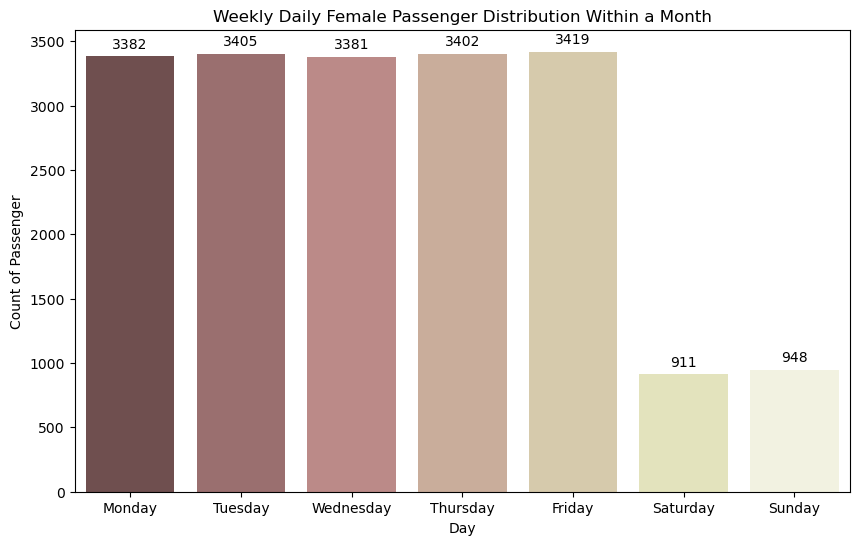

In [87]:
#Bar Chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=unique_passengers_per_day, x='Day', y='Unique Passenger Count', palette='pink')
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')
plt.title('Weekly Daily Female Passenger Distribution Within a Month')
plt.xlabel('Day')
plt.ylabel('Count of Passenger')
plt.show()

# # Pie Chart
# plt.figure(figsize=(10, 6))
# plt.pie(unique_passengers_per_day['Unique Passenger Count'], 
#         labels=unique_passengers_per_day['Day'], 
#         autopct='%1.1f%%', 
#         startangle=90,
#         colors=sns.color_palette('pink', n_colors=len(unique_passengers_per_day)))

# plt.title('Daily Female Passenger')
# plt.axis('equal')
# plt.show()

**Insight**

Berdasarkan visualisasi diatas, jumlah penumpang wanita di hari kerja jauh lebih tinggi (sekitar 3381 - 3419 penumpang) dan mengalami penurunan jumlah penumpang sekitar 73% di akhir pekan. 

## 4.2 Analisis Jumlah Penumpang wanita di Tujuh Koridor

In [80]:
female_passengers_corridorID = female_passengers[female_passengers['corridorID'].isin(['2', '3', '9', '13', '5C', '6', '13C'])]

display(female_passengers_corridorID)

jumlah_pengguna = female_passengers_corridorID['payCardID'].nunique()
print('Jumlah pengguna:', jumlah_pengguna, 'penumpang')

,transID,payCardID,Sex,Birth Date,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime,Day,Date,Age,AgeGroup
16,XDMP644Z5Y29DB,4556326832434362836,F,2004,13,Ciledug - Tendean,1.0,P00096,JORR,2023-04-03 06:49:48,P00001,Adam Malik,2023-04-03 07:47:42,Monday,03,19,Young Adult
48,ELVU605Z3W26IF,2718070346782735,F,2005,2,Pulo Gadung - Monas,0.0,P00202,Rawa Selatan,2023-04-03 06:35:17,P00161,Pecenongan,2023-04-03 07:17:52,Monday,03,18,Young Adult
49,KPDA909R2T72GD,342531623551844,F,1991,13,Ciledug - Tendean,1.0,P00044,CSW 1,2023-04-03 05:51:57,P00268,Velbak,2023-04-03 06:16:13,Monday,03,32,Adult
107,BNNJ428H8B05IR,30276672399789,F,1981,5C,PGC - Juanda,0.0,P00253,Tegalan,2023-04-03 06:56:00,P00142,Pal Putih,2023-04-03 07:27:18,Monday,03,42,Adult
255,IPRG491M6Z87AX,676170059098,F,2009,3,Kalideres - Bundaran HI via Veteran,1.0,P00091,Jembatan Gantung,2023-04-03 05:10:56,P00201,Rawa Buaya,2023-04-03 05:58:34,Monday,03,14,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37729,HFNY369G0Z98CA,4816654317647006,F,1986,6,Ragunan - Dukuh Atas 2,0.0,P00160,Patra Kuningan,2023-04-11 13:39:19,P00124,Latuharhary,2023-04-11 14:39:54,Tuesday,11,37,Adult
37750,PIMH287D7W34XB,4561136132951674782,F,1986,13,Ciledug - Tendean,1.0,P00043,Cipulir,2023-04-26 18:41:34,P00198,Puri Beta 2,2023-04-26 19:45:56,Wednesday,26,37,Adult
37787,WJPE009O0G78MQ,4507202110965479473,F,2003,3,Kalideres - Bundaran HI via Veteran,0.0,P00050,Dispenda Samsat Barat,2023-04-21 21:43:15,P00208,RS Sumber Waras,2023-04-21 23:13:37,Friday,21,20,Young Adult
37840,NYAM952W9T30DO,180096002521425,F,1996,3,Kalideres - Bundaran HI via Veteran,0.0,P00074,Grogol 1,2023-04-20 15:48:55,P00208,RS Sumber Waras,2023-04-20 17:39:27,Thursday,20,27,Young Adult


Jumlah pengguna: 62 penumpang


In [81]:
analysis_per_corridor = female_passengers_corridorID.groupby('corridorID')['payCardID'].nunique().reset_index(name='Unique Passenger Count')
analysis_per_corridor

,corridorID,Unique Passenger Count
0,13,14
1,13C,9
2,2,7
3,3,9
4,5C,9
5,6,10
6,9,4


**Insight**

Berdasarkan tabel di atas, koridor 13 memiliki jumlah penumpang wanita dengan ID unik terbanyak, yaitu 14 orang. Diikuti oleh koridor 6, dengan jumlah penumpang wanita unik sebanyak 10 orang. Sementara itu, jumlah penumpang wanita dengan ID unik paling sedikit terdapat pada koridor 9, yaitu 4 orang.

Insight ini menunjukkan bahwa koridor 13 dan koridor 6 memiliki tingkat penggunaan yang lebih tinggi di antara penumpang wanita, sedangkan koridor 9 memiliki tingkat penggunaan yang paling rendah.

## 4.2 Proporsi Proyeksi Jumlah Penumpang Harian untuk Setiap Minggu dalam Sebulan

In [82]:
analysis_per_day_corridor = female_passengers_corridorID.groupby(['corridorID', 'Day'])['transID'].size().reset_index(name='Monhtly Passenger Count')
analysis_per_day_corridor['Monhtly Passenger Count'] = analysis_per_day_corridor['Monhtly Passenger Count']

unique_per_day = female_passengers_corridorID.groupby('Day')['transID'].size().reset_index(name='Daily Passenger Count')

display(analysis_per_day_corridor.head(), unique_per_day)

,corridorID,Day,Monhtly Passenger Count
0,13,Monday,28
1,13,Tuesday,30
2,13,Wednesday,34
3,13,Thursday,30
4,13,Friday,30


,Day,Daily Passenger Count
0,Monday,115
1,Tuesday,116
2,Wednesday,127
3,Thursday,122
4,Friday,123
5,Saturday,18
6,Sunday,20


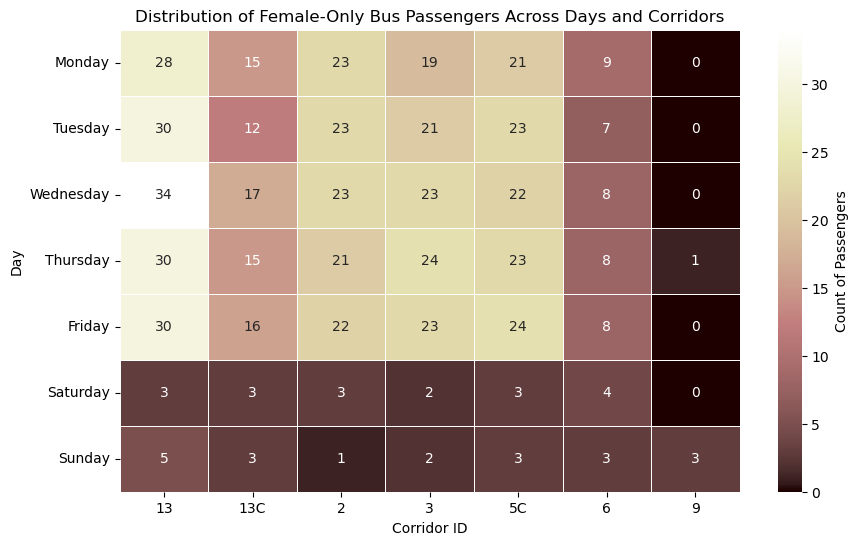

In [83]:
heatmap_data = female_passengers_corridorID.groupby(['Day', 'corridorID'])['transID'].size().unstack()

# Membuat plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='pink',
            linewidths=0.5, linecolor='white',
            cbar_kws={'label': 'Count of Passengers'})

# Menambahkan judul dan label sumbu
plt.title('Distribution of Female-Only Bus Passengers Across Days and Corridors')
plt.xlabel('Corridor ID')
plt.ylabel('Day')
plt.show()

**Insight**

1. Pola Hari Kerja:
    - Koridor 13 memiliki jumlah penumpang tertinggi di hari kerja berkisar antara 28-34 penumpang;
    - Koridor 2, 3, dan 5C menunjukkan konsistensi dengan rata-rata 21-24 penumpang di hari kerja.

2. Pola per Koridor:
    - Koridor 13 & 13C: Tinggi di hari kerja, sangat rendah di akhir pekan
    - Koridor 2, 3, 5C: Konsisten di hari kerja (21-24), rendah di akhir pekan
    - Koridor 6: Relatif rendah (7-9 penumpang) di hari kerja
    - Koridor 9: Hampir tidak ada aktivitas (0-1 penumpang)

## 4.3 Proyeksi Jumlah Penumpang Harian untuk Setiap Minggu dalam Sebulan

Data yang ditampilkan di HeatMap merupakan sampel yang terbatas. Untuk mendapatkan proyeksi total jumlah penumpang pada masing-masing koridor, data sampel akan dikali dengan 500. Angka ini diambil berdasarkan perhitungan berikut:

**Persentase Sampel TransJakarta**: 
$$
\text{Persentase Sampel TransJakarta} = \left( \frac{\text{Sampel TransJakarta}}{\text{Populasi TransJakarta}} \right) \times 100
$$

**Representasi Sampel Populasi**: 
$$
\text{Representasi Sampel Populasi} = \frac{100}{\text{Persentase Sampel TransJakarta}}
$$

Dengan menggunakan penggandaan ini, diharapkan dapat memperkirakan jumlah penumpang yang lebih representatif di setiap koridor serta dapat mengambil keputusan yang lebih baik dalam meningkatkan layanan dan memenuhi kebetuhan penumpang.

In [84]:
analysis_per_day_corridor = female_passengers_corridorID.groupby(['corridorID', 'Day'])['transID'].size().reset_index(name='Count of Passengers')
analysis_per_day_corridor['Real Time Passenger'] = analysis_per_day_corridor['Count of Passengers'] * 500

analysis_per_day_corridor.head()

,corridorID,Day,Count of Passengers,Real Time Passenger
0,13,Monday,28,14000
1,13,Tuesday,30,15000
2,13,Wednesday,34,17000
3,13,Thursday,30,15000
4,13,Friday,30,15000


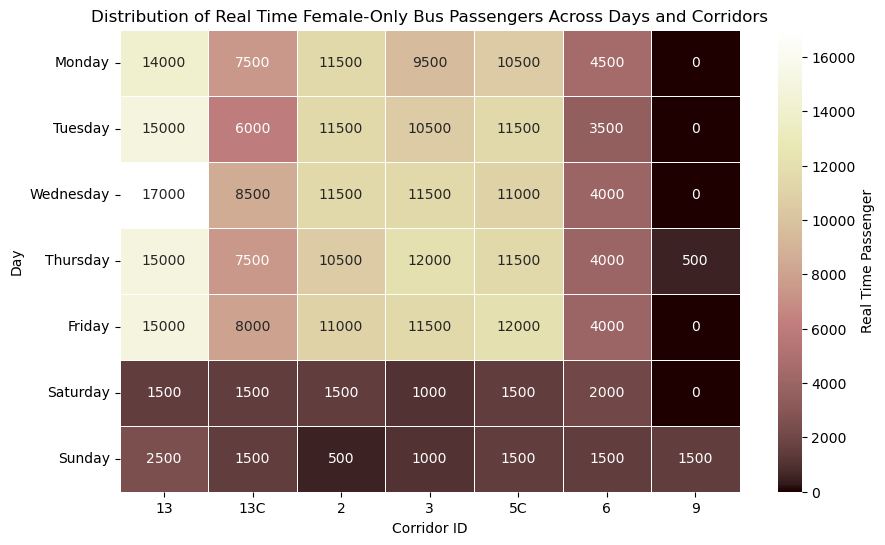

In [85]:
heatmap_data = analysis_per_day_corridor.pivot(columns='corridorID', index='Day', values='Real Time Passenger')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='pink', linewidths=.5,
            linecolor='white', cbar_kws={'label': 'Real Time Passenger'})

plt.title('Distribution of Real Time Female-Only Bus Passengers Across Days and Corridors')
plt.xlabel('Corridor ID')
plt.ylabel('Day')
plt.show()

**Insight**:

1. Pola Koridor:
    - Koridor 13 paling ramai dengan rata-rata 15.000-17.000 penumpang di hari kerja
    - Koridor 2, 3, dan 5C cukup stabil di angka 10.500-12.000 penumpang 
    - Koridor 13C menengah dengan 6.000-8.500 penumpang
    - Koridor 6 paling sepi di hari kerja (3.500-4.500 penumpang)
    - Koridor 9 hampir tidak ada aktivitas di hari kerja

2. Pola Hari:
    - Rabu adalah hari tersibuk, terutama di koridor 13 (17.000 penumpang)
    - Hari kerja secara umum konsisten tinggi
    - Penurunan drastis di akhir pekan untuk semua koridor
    - Sabtu lebih sepi dibanding Minggu di beberapa koridor

3. Kontras Hari Kerja vs Akhir Pekan:
    - Penurunan hingga 90% di beberapa koridor
    - Sabtu: rata-rata 1.000-2.000 penumpang per koridor
    - Minggu: sedikit lebih ramai dari Sabtu di beberapa koridor

# 5. Kesimpulan dan Rekomendasi

## 5.1 Kesimpulan

Kesimpulan dari analisis dengan judul **Evaluasi Data Penggunaan Bus Khusus wanita sebagai Transportasi Aman di Jakarta**

1. **Efektivitas Penggunaan Bus Khusus wanita (Distribusi Penumpang Harian)**
    - Layanan menunjukkan efektivitas tinggi di hari kerja dengan rata-rata okupansi yang stabil;
    - Terdapat perbedaan antara penggunaan di hari kerja dan akhir pekan, menunjukkan layanan ini terutama dimanfaatkan untuk aktivitas kerja/sekolah;
    - Pola penggunaan yang konsisten di hari kerja mengindikasikan layanan telah menjadi bagian dari rutinitas transportasi penumpang wanita.

2. **Identifikasi Pola Penggunaan Berdasarkan Koridor**
    - Koridor 13 muncul sebagai rute tersibuk, menunjukkan tingginya permintaan di area yang dilayani;
    - Koridor 2, 3, dan 5C menunjukkan stabilitas penggunaan yang baik;
    - Koridor 6 dan 9 memiliki tingkat penggunaan yang rendah, mengindikasikan potensi masalah dalam perencanaan rute atau demand.
    - Pola penggunaan menunjukkan konsentrasi penumpang di koridor-koridor yang menghubungkan area residential dengan pusat bisnis/aktivitas

## 5.2 Rekomendasi

1. **Optimalisasi Armada**
    - Tingkatkan jumlah bus di koridor 13 terutama pada hari Rabu
    - Sesuaikan jumlah armada di akhir pekan untuk efisiensi operasional
  
2. **Evaluasi dan Penyesuaian Rute**
    - Lakukan kajian mendalam untuk koridor 6 dan 9
    - Pertimbangkan restrukturisasi rute di koridor dengan penggunaan rendah